In [39]:
import warnings  
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import os
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report
import itertools
plt.style.use('fivethirtyeight')

In [40]:
df=pd.read_csv('diabetes.csv')

# Data Cleaning & Data Preparation
In this step we will find missing entries, if there then fill them with median or mean values, checking data types of all the features to find any inconsistency.

In [41]:
df.isna().any() # No NAs

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [42]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.0 KB
None


In [44]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It seems from the above table that there are zero entries in BMI, Blood Pressure,Glucose, Skin Thickness and Insulin which are meaningless so we will fill it with their median values before fitting it into the machine learning models.

Replacing zero entries BMI, Blood Pressure,Glucose, Skin Thickness and Insulin with their median values

In [45]:
# Calculate the median value for BMI
mean_bmi = df['BMI'].mean()
# Substitute it in the BMI column of the
# dataset where values are 0
df['BMI'] = df['BMI'].replace(
    to_replace=0, value=mean_bmi)

mean_bloodp = df['BloodPressure'].mean()
# Substitute it in the BloodP column of the
# dataset where values are 0
df['BloodPressure'] = df['BloodPressure'].replace(
    to_replace=0, value=mean_bloodp)

# Calculate the median value for PlGlcConc
mean_plglcconc = df['Glucose'].mean()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
df['Glucose'] = df['Glucose'].replace(
    to_replace=0, value=mean_plglcconc)

# Calculate the median value for SkinThick
mean_skinthick = df['SkinThickness'].mean()
# Substitute it in the SkinThick column of the
# dataset where values are 0
df['SkinThickness'] = df['SkinThickness'].replace(
    to_replace=0, value=mean_skinthick)

# Calculate the median value for SkinThick
mean_skinthick = df['Insulin'].mean()
# Substitute it in the SkinThick column of the
# dataset where values are 0
df['Insulin'] = df['Insulin'].replace(
    to_replace=0, value=mean_skinthick)

In [46]:
from pandas_profiling import ProfileReport

file = ProfileReport(df)
file.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization

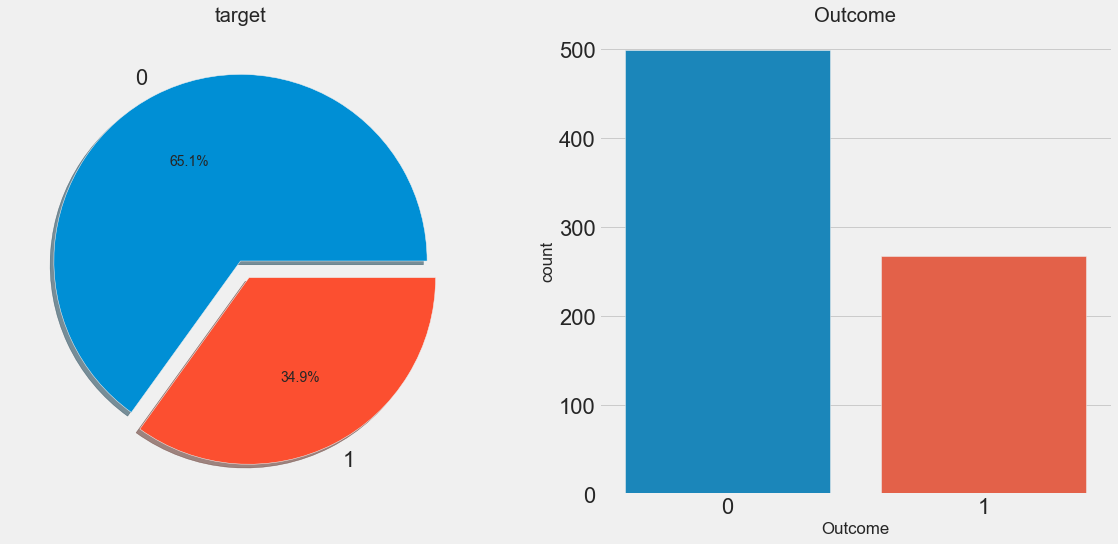

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

# Histogram
In this step we will analyze histogram of all the independent variables

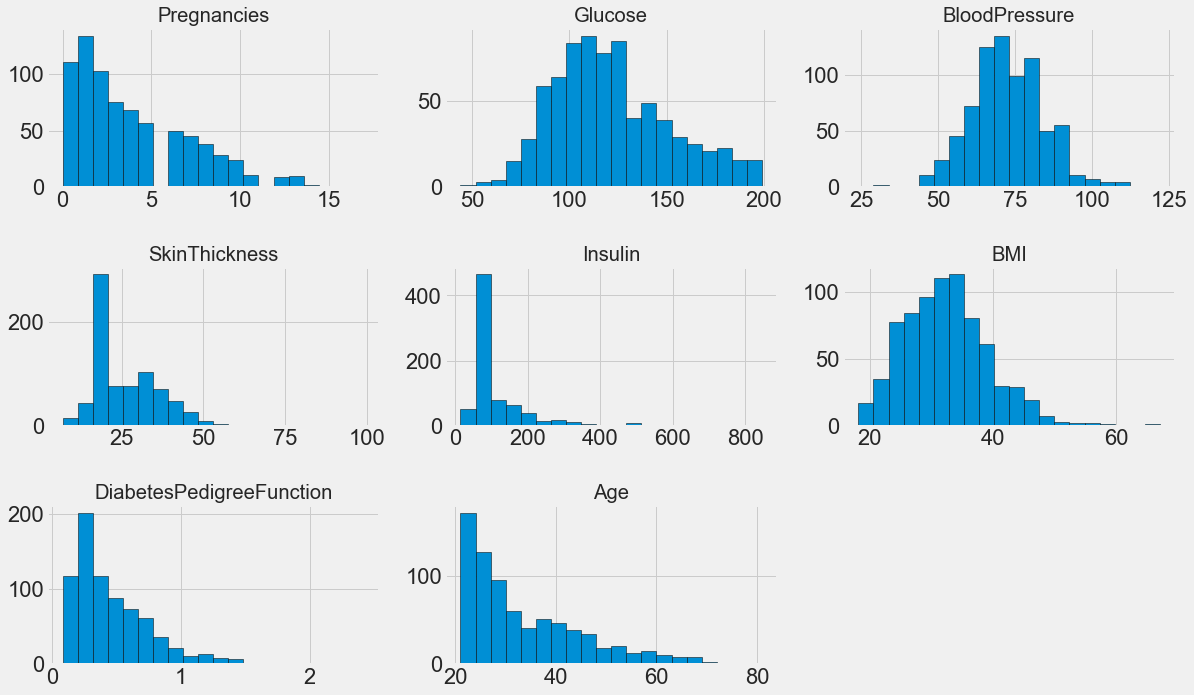

In [48]:
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

# Histogram of Diabetic Cases

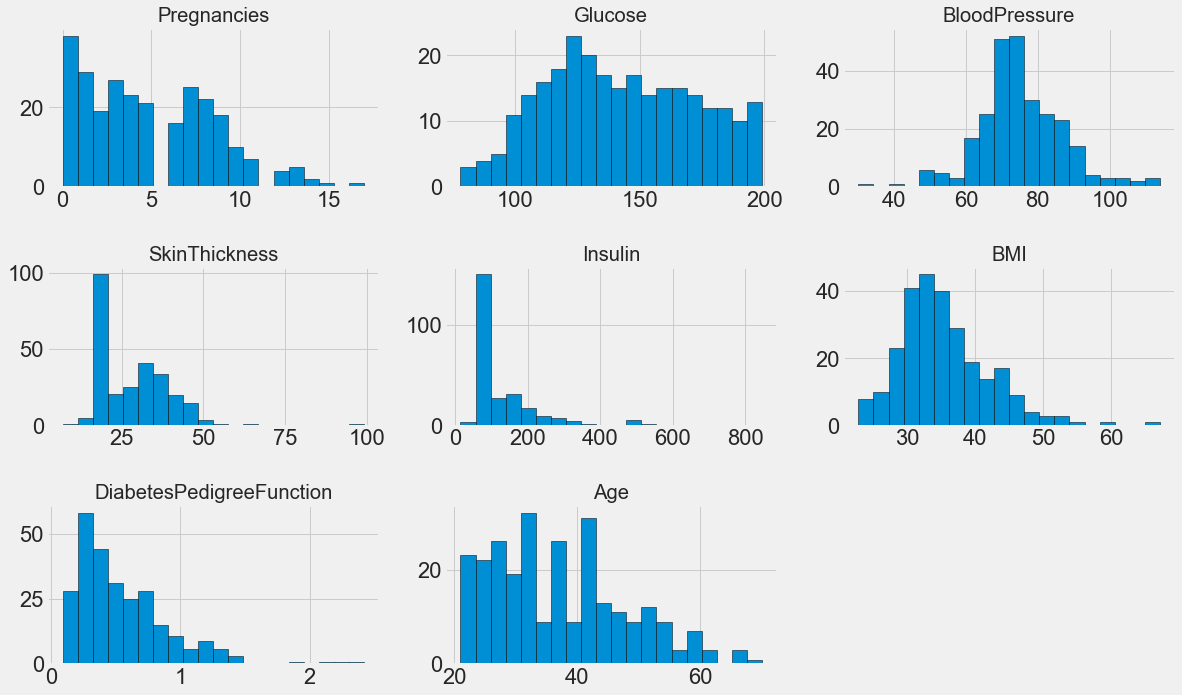

In [49]:
df1=df[df['Outcome']==1]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

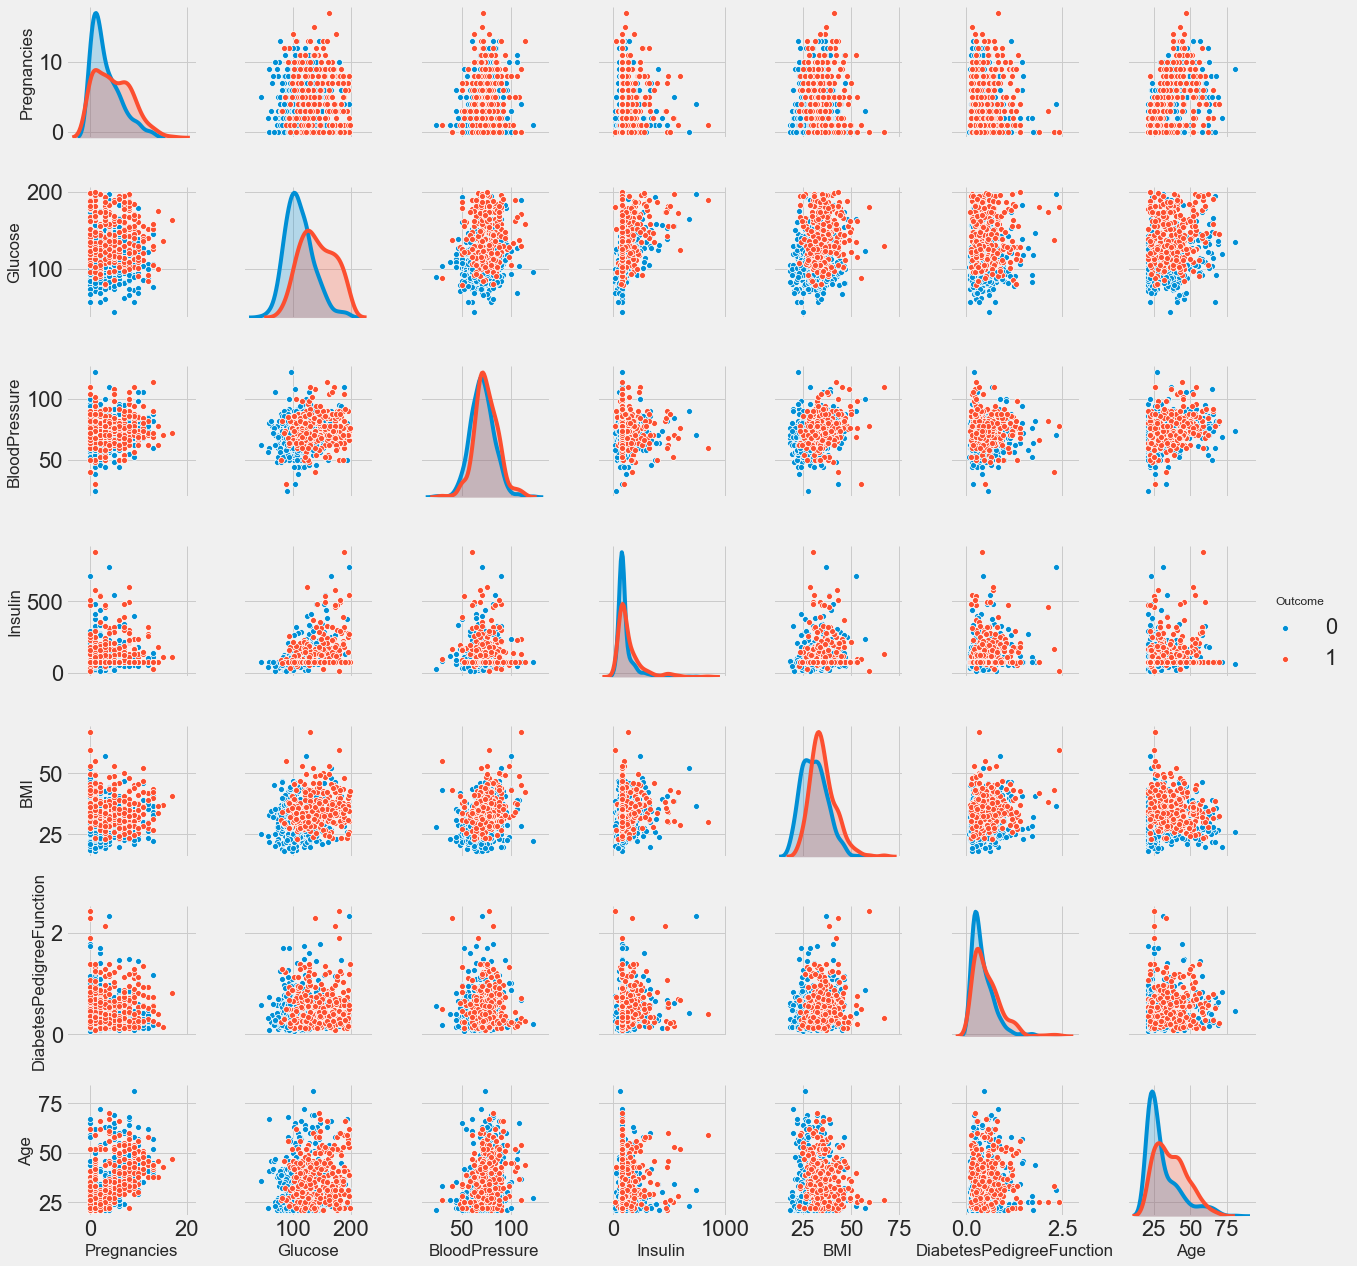

In [50]:
sns.pairplot(df, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin','BMI','DiabetesPedigreeFunction','Age'] )

# Feature Slection using chi-square test

In [51]:
X = df.iloc[:,0:8] 
y = df.iloc[:,-1]   
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(8,'Score'))


                   Features        Score
4                   Insulin  1790.288061
1                   Glucose  1414.040107
7                       Age   180.094138
0               Pregnancies   110.681200
5                       BMI   108.805082
3             SkinThickness    82.382225
2             BloodPressure    41.331153
6  DiabetesPedigreeFunction     5.366087


# Plotting Correlation Plot (Heat Map)

arrow_upward

arrow_downward

delete

unfold_less

more_vert
Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.




In [52]:
df1=df.drop(['Outcome'],axis=1)

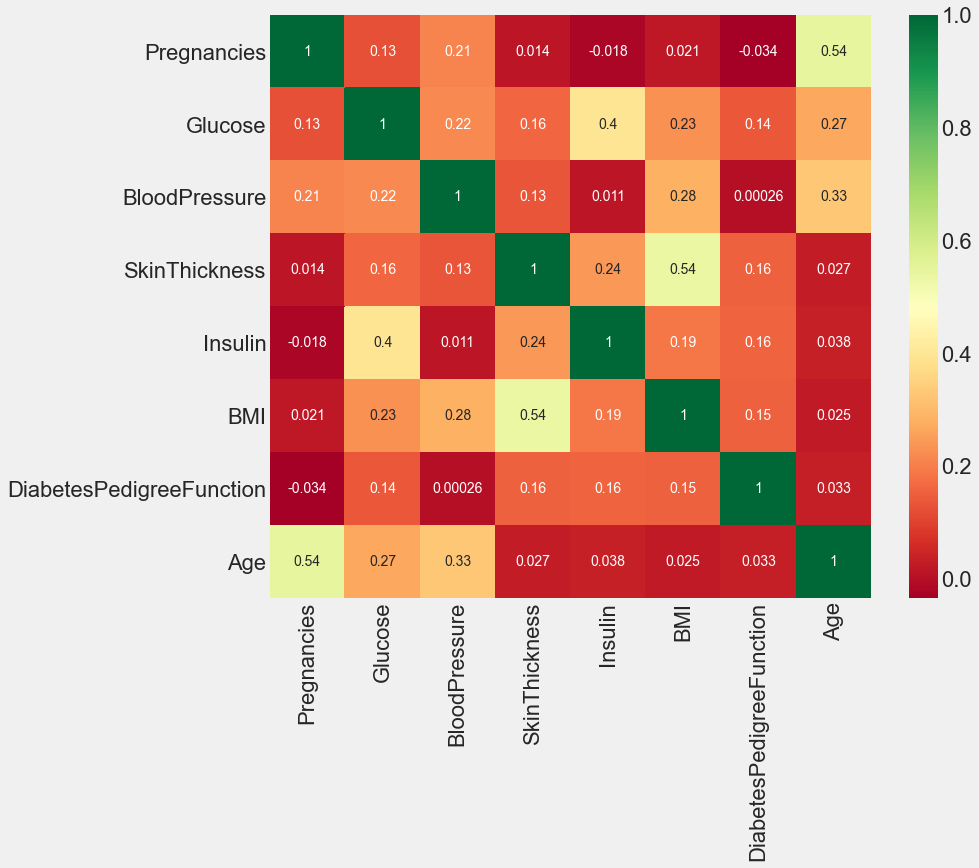

In [53]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df1.corr(), annot=True,cmap ='RdYlGn')

# Segregating Feature & Target Variable

In [54]:
feature_cols = ['Glucose','Age','BMI','Pregnancies','Insulin' ]
X = df[feature_cols]

y = df['Outcome']

In [55]:



X.head()

,Glucose,Age,BMI,Pregnancies,Insulin
0,148.0,50,33.6,6,79.90352
1,85.0,31,26.6,1,79.90352
2,183.0,32,23.3,8,79.90352
3,89.0,21,28.1,1,94.00000
4,137.0,33,43.1,0,168.00000


In [56]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Train Test Split
The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

Stratify property in train test split This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

# Data Normalization

In [58]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train = (X_train - min_train)/range_train

In [59]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test = (X_test - min_test)/range_test

In [60]:
X_test.isna().sum()

Glucose        0
Age            0
BMI            0
Pregnancies    0
Insulin        0
dtype: int64

# Applying Machine Learning Model

In [61]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train);
## Evaluating the model
y_pred=log_reg.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
log_reg=accuracy_score(y_pred,y_test)
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        99
           1       0.74      0.73      0.73        55

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154

[[85 14]
 [15 40]]
accuracy is  0.8116883116883117


In [62]:
## Build an model (Support Vector Machine)

from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
svm=accuracy_score(y_pred,y_test)
print('accuracy is ',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83        91
           1       0.78      0.67      0.72        63

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.78       154

[[79 12]
 [21 42]]
accuracy is  0.7857142857142857


In [63]:
## Build an model (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
y_pred=knn.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
knn=accuracy_score(y_pred,y_test)
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        85
           1       0.72      0.57      0.63        69

    accuracy                           0.71       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.71      0.71      0.70       154

[[70 15]
 [30 39]]
accuracy is  0.7077922077922078


In [64]:

Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
score=accuracy_score(y_pred,y_test)
print('accuracy is ',score)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       102
           1       0.72      0.75      0.74        52

    accuracy                           0.82       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154

[[87 15]
 [13 39]]
accuracy is  0.8181818181818182


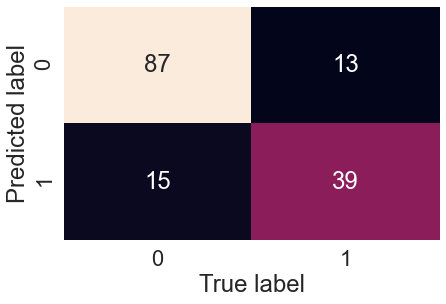

In [65]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [66]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                              "Support Vector Machine":svm,
                              "KNeighbours classifier":knn,
                            "Random Forest Classifier":score
                        
                            },index=["accuracy"])
model_compare


,Logistic Regression,Support Vector Machine,KNeighbours classifier,Random Forest Classifier
accuracy,0.811688,0.785714,0.707792,0.818182


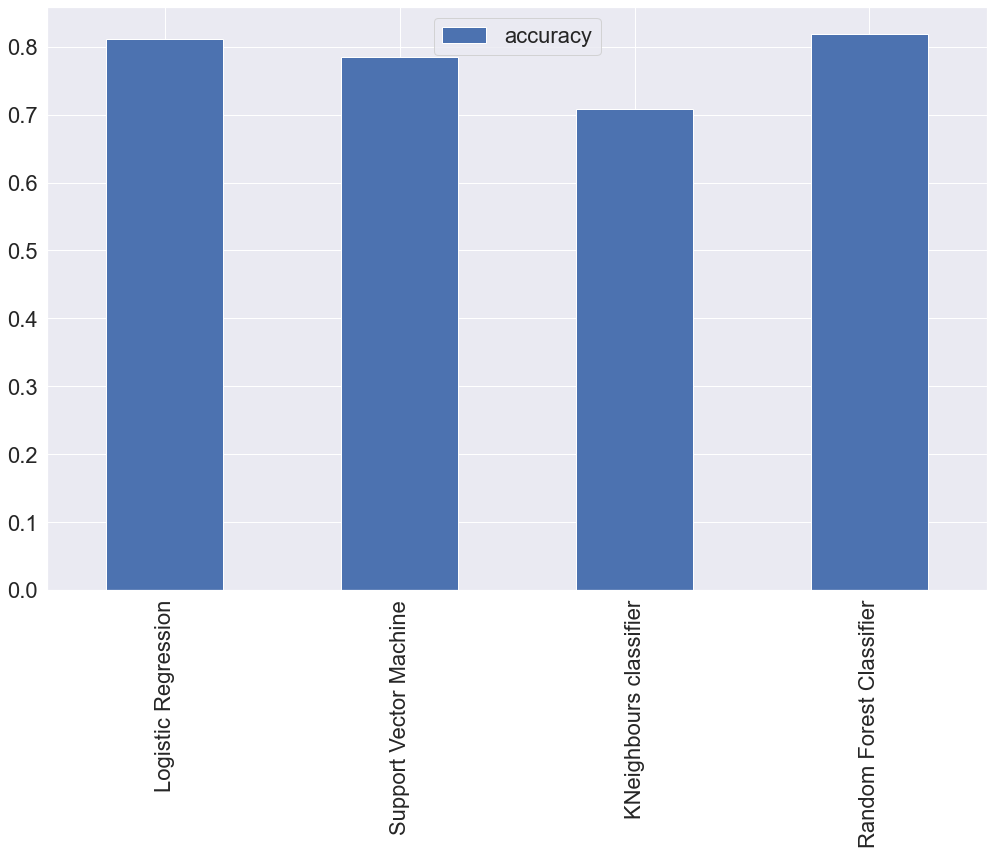

In [67]:
model_compare.T.plot.bar(figsize=(15,10));

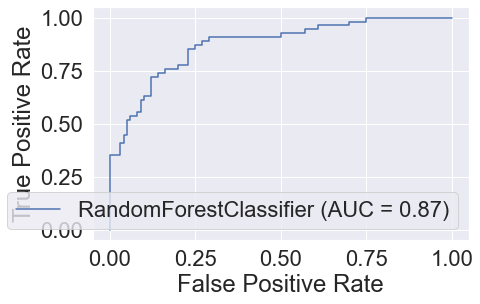

In [68]:
# plot ROC curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Model,X_test,y_test)

In [69]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=48)
rfc_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [46]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc_model, random_state=48).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist(),top=13)

Weight,Feature
0.1083 ± 0.0738,Glucose
0.0323 ± 0.0363,Age
0.0198 ± 0.0212,Pregnancies
0.0177 ± 0.0482,BMI
0.0156 ± 0.0295,Insulin


In [70]:
import pickle

# Save trained model to file
pickle.dump(Model, open("Diabetes_Final.pkl", "wb"))

In [71]:
loaded_model = pickle.load(open("Diabetes_Final.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8181818181818182